In [562]:
import fssa
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from scipy.optimize import curve_fit
import matplotlib.colors as colors
from numpy import polyfit, poly1d
from scipy.interpolate import interp1d
import glob
from scipy import signal
import string
#np.set_printoptions(threshold=np.inf)

In [563]:
#24 sites
file_name = 'Overlap*L22*' 
data = []
data_path = glob.glob(('C:/Users/wangy/Rydberg simulation/rydberg_data/2_18/'+file_name))
data_path

['C:/Users/wangy/Rydberg simulation/rydberg_data/2_18\\Overlap2023_02_18_22_31_24_L22_1',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/2_18\\Overlap2023_02_18_22_31_30_L22_1',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/2_18\\Overlap2023_02_19_16_13_24_L22_1',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/2_18\\Overlap2023_02_19_17_13_26_L22_1',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/2_18\\Overlap2023_02_20_00_10_48_L22_1',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/2_18\\Overlap2023_02_20_14_36_11_L22_1',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/2_18\\Overlap2023_02_20_14_49_19_L22_1',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/2_18\\Overlap2023_02_20_15_44_45_L22_1',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/2_18\\Overlap2023_02_20_15_53_55_L22_1',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/2_18\\Overlap2023_02_20_16_03_16_L22_1',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/2_18\\Overlap2023_02_20_16_49_40_L22_1',
 'C:/Users

In [564]:
# #24 sites
# file_name = 'Overlap*L22*' 
# data = []
# data_path = glob.glob(('C:/Users/wangy/Rydberg simulation/rydberg_data/2_18/'+file_name))
# data_path
data_path = [
 'C:/Users/wangy/Rydberg simulation/rydberg_data/2_18\\Overlap2023_02_20_14_36_11_L22_1',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/2_18\\Overlap2023_02_20_15_44_45_L22_1',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/2_18\\Overlap2023_02_20_15_53_55_L22_1',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/2_18\\Overlap2023_02_20_16_03_16_L22_1',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/2_18\\Overlap2023_02_18_22_31_24_L22_1',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/2_18\\Overlap2023_02_20_16_49_40_L22_1',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/2_18\\Overlap2023_02_20_16_57_20_L22_1',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/2_18\\Overlap2023_02_20_17_04_58_L22_1',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/2_18\\Overlap2023_02_20_17_12_26_L22_1',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/2_18\\Overlap2023_02_19_16_13_24_L22_1',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/2_18\\Overlap2023_02_19_17_13_26_L22_1',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/2_18\\Overlap2023_02_20_00_10_48_L22_1' ,
'C:/Users/wangy/Rydberg simulation/rydberg_data/2_18\\Overlap2023_02_20_18_07_03_L22_1',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/2_18\\Overlap2023_02_20_18_14_47_L22_1',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/2_18\\Overlap2023_02_20_18_22_23_L22_1',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/2_18\\Overlap2023_02_20_18_30_20_L22_1',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/2_18\\Overlap2023_02_20_18_38_00_L22_1',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/2_18\\Overlap2023_02_20_18_45_56_L22_1',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/2_18\\Overlap2023_02_20_18_53_49_L22_1',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/2_18\\Overlap2023_02_20_19_01_50_L22_1',
     'C:/Users/wangy/Rydberg simulation/rydberg_data/2_18\\Overlap2023_02_21_10_59_17_L22_1']

In [565]:
overlaps = []
zs = []
zzs = []
zgs =[]
zzgs = []
pos_occupieds = []
Ns = len(data_path) # number of case 
tsteps = []
for data_path_i in data_path:
    print(data_path_i)
    overlaps.append(np.loadtxt(data_path_i,delimiter=','))
    pub_path = (data_path_i.split('\\'))[0]
    temp = data_path_i.split('\\')[1]
    #print(temp)
    zs.append(np.loadtxt(pub_path+'/z_'+temp.split('Overlap')[1],delimiter=','))
    zzs.append(np.loadtxt(pub_path+'/zz_'+temp.split('Overlap')[1],delimiter=','))
    zgs.append(np.loadtxt(pub_path+'/zg_'+temp.split('Overlap')[1],delimiter=','))
    zzgs.append(np.loadtxt(pub_path+'/zzg_'+temp.split('Overlap')[1],delimiter=','))
    pos_occupieds.append(np.loadtxt(pub_path+'/pos_occupied_'+temp.split('Overlap')[1],delimiter=','))
#     print(np.loadtxt(pub_path+'/pos_occupied_'+temp.split('Overlap')[1],delimiter=','))
#     print(len(np.loadtxt(pub_path+'/z_'+temp.split('Overlap')[1],delimiter=',')))
N = len(pos_occupieds[0])


C:/Users/wangy/Rydberg simulation/rydberg_data/2_18\Overlap2023_02_20_14_36_11_L22_1
C:/Users/wangy/Rydberg simulation/rydberg_data/2_18\Overlap2023_02_20_15_44_45_L22_1
C:/Users/wangy/Rydberg simulation/rydberg_data/2_18\Overlap2023_02_20_15_53_55_L22_1
C:/Users/wangy/Rydberg simulation/rydberg_data/2_18\Overlap2023_02_20_16_03_16_L22_1
C:/Users/wangy/Rydberg simulation/rydberg_data/2_18\Overlap2023_02_18_22_31_24_L22_1
C:/Users/wangy/Rydberg simulation/rydberg_data/2_18\Overlap2023_02_20_16_49_40_L22_1
C:/Users/wangy/Rydberg simulation/rydberg_data/2_18\Overlap2023_02_20_16_57_20_L22_1
C:/Users/wangy/Rydberg simulation/rydberg_data/2_18\Overlap2023_02_20_17_04_58_L22_1
C:/Users/wangy/Rydberg simulation/rydberg_data/2_18\Overlap2023_02_20_17_12_26_L22_1
C:/Users/wangy/Rydberg simulation/rydberg_data/2_18\Overlap2023_02_19_16_13_24_L22_1
C:/Users/wangy/Rydberg simulation/rydberg_data/2_18\Overlap2023_02_19_17_13_26_L22_1
C:/Users/wangy/Rydberg simulation/rydberg_data/2_18\Overlap2023_0

In [566]:
crit_id0 = np.argmin(abs(data[1]-1.53))
fig, ax = plt.subplots(2, 3, figsize=(15,5))
MS = 1
LS = '-'
plt.subplots_adjust(wspace=0.5,hspace=0.5)
data = overlaps[0]
ax[0,2].plot(data[0],data[1],marker='o',markersize=MS,ls=LS)
ax[0,2].set_xlabel('t')
ax[0,2].set_ylabel('Detuning(MHz)')
ax[0,0].plot(data[0],data[2],marker='o',markersize=MS,ls=LS)
ax[0,0].set_xlabel('t')
ax[0,0].set_ylabel('Rabi(MHz)')
ax[0,1].plot(data[0],data[3],marker='o',markersize=MS,ls=LS)
ax[0,1].set_xlabel('t')
ax[0,1].set_ylabel('overlap with GGG')
ax[1,0].plot(data[0],data[4],marker='o',markersize=MS,ls=LS)
ax[1,0].set_ylim([0,1])
ax[1,0].set_xlabel('t')
ax[1,0].set_ylabel('overlap with afm')

ax[1,1].plot(data[0],data[5],marker='o',markersize=MS,ls=LS)
ax[1,1].set_xlabel('t')
ax[1,1].set_ylabel('overlap with ground state')

# ax[1,2].plot(data[0],data[7],marker='o',markersize=MS,ls=LS)
# ax[1,2].set_xlabel('t')
# ax[1,2].set_ylabel('overlap with 1st excited state')
for i in range(6):
    ax[i//3,i%3].axvline(data[0,crit_id0])

IndexError: list index out of range

In [ ]:
def n_r(pos_occupied,z,holetype = 1): # rydberg population
    tsteps = len(z)
    thisn_r = np.zeros([tsteps,N])
    atomid = np.where(pos_occupied == 1)
    holeid = np.where(pos_occupied == 0)
    for tstep in range(tsteps):
        for i in range(len(atomid)):
            thisatomid = atomid[i]
            thisn_r[tstep,thisatomid] = (1+z[tstep,i])/2
    
        for j in holeid:
            if holetype == 1: # hole considered as a lost atom(Rydberg)
                thisn_r[tstep,j] = 1
            if holetype == 0: # hole considered as a ground atom
                thisn_r[tstep,j] = 0

    return thisn_r

def nn_r(pos_occupied,z,zz,holetype = 1): # rydberg connector
    tsteps = len(z)
    thisn_r = np.zeros([tsteps,N,N])
    atomid = np.where(pos_occupied == 1)[0]
    N_atom = len(atomid)
    holeid = np.where(pos_occupied == 0)[0]
    N_hole = len(holeid)
    thiszz = zz.reshape([tsteps,N_atom,N_atom])
   # print(atomid,holeid)
    for tstep in range(tsteps):
        #print(tstep)
        for i in range(N_atom):
            #print('i',i)
            thisatomid_i = atomid[i]
            for j in range(i,N_atom):
#                 print(j)
                thisatomid_j = atomid[j]
#                 print('initial',thisn_r[tstep])
                thisn_r[tstep,thisatomid_i,thisatomid_j] = (thiszz[tstep,i,j]+z[tstep,i]+z[tstep,j]+1)/4
                thisn_r[tstep,thisatomid_j,thisatomid_i] = (thiszz[tstep,i,j]+z[tstep,i]+z[tstep,j]+1)/4

#                 print(thisatomid_i,thisatomid_j,'both atom')
#                 print('value',(thiszz[tstep,i,j]+z[tstep,i]+z[tstep,j]+1)/4)
#                 print(thisn_r[tstep])
            #print(thisn_r[tstep])
            for j_hole in range(N_hole):
        
#                 print(j_hole)
                thisholeid_j = holeid[j_hole]
#                 print('initial',thisn_r[tstep])

                if holetype == 1:
                    thisn_r[tstep,thisatomid_i,thisholeid_j] = (z[tstep,i]+1)/2
                    thisn_r[tstep,thisholeid_j,thisatomid_i] = thisn_r[tstep,thisatomid_i,thisholeid_j]
#                     print(i,j_hole,thisatomid_i,thisholeid_j,'i_atom','j_hole')
#                     print(thisn_r[tstep])

                if holetype == 0:
                    thisn_r[tstep,thisatomid_i,thisholeid_j] = 0
            #print(thisn_r[tstep])
        for i_hole in range(N_hole):
            thisholeid_i = holeid[i_hole]
#             for j in range(len(atomid)):
#                 thisatomid_j = atomid[j]
#                 if holetype == 1:
#                     thisn_r[tstep,thisholeid_i,thisatomid_j] = (z[tstep,j]+1)/2
#                     #print(i_hole,j,thisholeid_i,thisatomid_j,'i_hole','j_atom',thisn_r[tstep,thisholeid_i,thisatomid_j])

#                 if holetype == 0:
#                     thisn_r[tstep,thisholeid_i,thisatomid_j] = 0
            for j_hole in range(i_hole,N_hole):
                thisholeid_j = holeid[j_hole]
                if holetype == 1:
                    thisn_r[tstep,thisholeid_i,thisholeid_j] = 1
                    thisn_r[tstep,thisholeid_j,thisholeid_i] = 1

                    #print(i_hole,j_hole,thisholeid_i,thisholeid_j,'i_hole','j_hole',thisn_r[tstep,thisholeid_i,thisatomid_j])

#                 if holetype == 0:
#                     thisn_r[tstep,thisholeid_i,thisatomid_j] = 0
#             print(tstep)
           # print(thisn_r[tstep])
    return thisn_r
def sigma1(pos_occupied,z,holetype = 1): # 1-point sigma field
    thisn_r = n_r(pos_occupied,z,holetype)
    tsteps = len(z)
    N = np.shape(thisn_r)[1]
    meanmatrix = (np.repeat(np.mean(thisn_r,axis = 1),N)).reshape([tsteps,N])
    sign = np.ones(N)
    sign[1::2]=-1
    signmatrix = np.broadcast_to(sign, (tsteps, N))
    return signmatrix*(thisn_r-meanmatrix)

def sigma2(pos_occupied,z,zz,holetype = 1):
    thisn_r = n_r(pos_occupied,z,holetype)
    thisnn_r = nn_r(pos_occupied,z,zz,holetype)
    tsteps = len(z)
    N = np.shape(thisn_r)[1]
    thissigma2 = np.zeros((tsteps,N,N))
    meanarray = np.mean(thisn_r,axis = 1)
    for t_id in range(tsteps):
        for i in range(N):
            for j in range(N):
                thissigma2[t_id,i,j] = (-1)**(i+j)*(thisnn_r[t_id,i,j] - \
                meanarray[t_id]*(thisn_r[t_id,i]+thisn_r[t_id,j])+meanarray[t_id]**2)
    return thissigma2

def ave_2point(nn): # assuming the rotation symmetry and apply averaging
    tsteps = np.shape(nn)[0]
    N = np.shape(nn)[1]
    averaged_d = np.zeros((tsteps,N))
    for t_id in range(tsteps):
        for i in range(N):
            averaged_d[t_id,i] = (np.trace(nn[t_id],i)+np.trace(nn[t_id],N-i))/N
    return averaged_d

[0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.

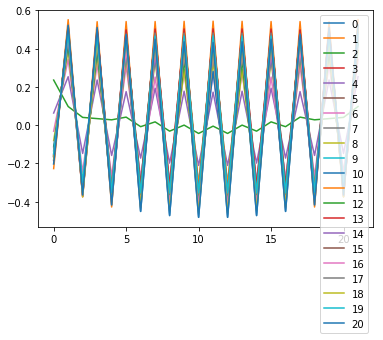

In [541]:
#fig,ax = plt.subplots(ncols = Ns ,nrows=1,figsize=(15,5))
#temp = nn_r(pos_occupieds[2],zs[2],zzs[2],1)[:,0]
for sample_N in range(Ns):
    print(pos_occupieds[sample_N])
    temp = sigma2(pos_occupieds[sample_N],zs[sample_N],zzs[sample_N],1)
    temp1 = ave_2point(temp)
    #for i in range(120,130,5):
    plt.plot(np.arange(22),temp1[125],label = sample_N )
plt.legend()
# for i in range(N):
#     ax[i//4,i%4].plot(overlaps[2][0],temp[:,i])
#     #ax[i//4,i%4].plot(overlaps[2][0],n_r(pos_occupieds[2],zs[2],1)[:,i])
#     #ax[i//4,i%4].plot(overlaps[2][0],sigma1(pos_occupieds[2],zs[2],1)[:,i])
#     #ax[i//4,i%4].plot(overlaps[2][0],sigma2(pos_occupieds[2],zs[2],zzs[2],1)[:,0,i])
#     ax[i//4,i%4].set_ylim([-1,1])

[0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.

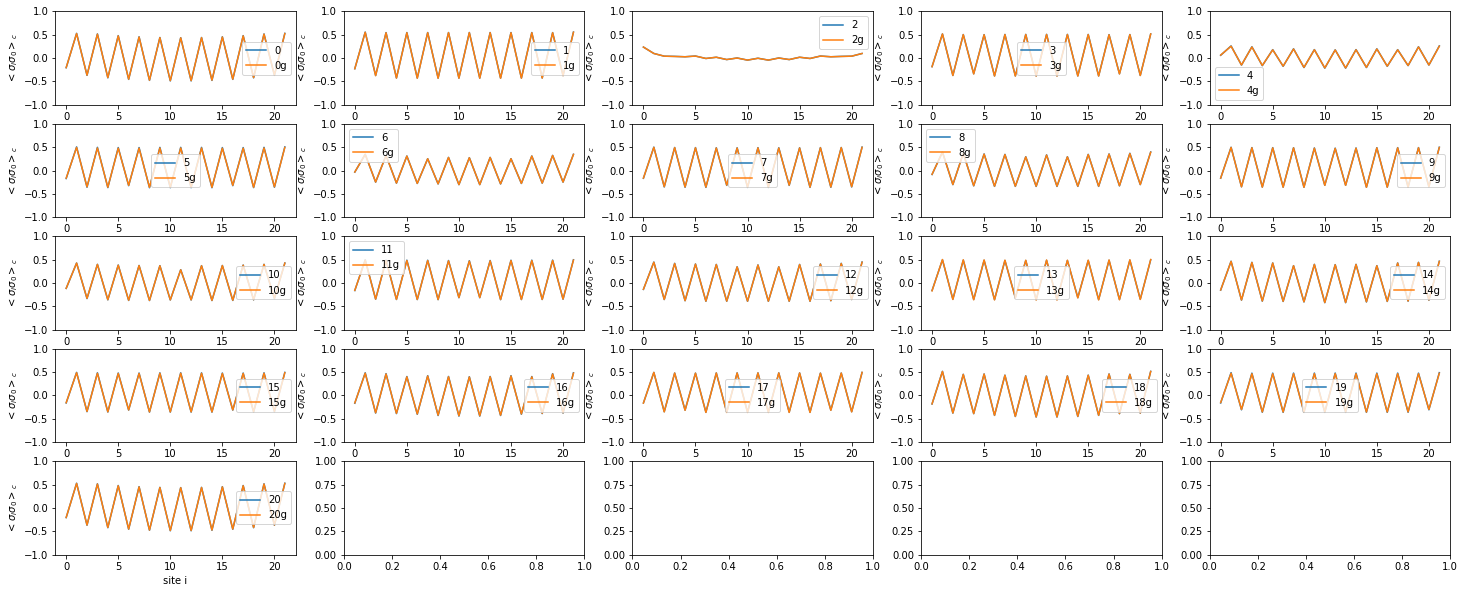

In [554]:
fig,ax = plt.subplots(ncols = 5 ,nrows=5,figsize=(25,10))
fs = 10
#temp = nn_r(pos_occupieds[2],zs[2],zzs[2],1)[:,0]
for sample_N in range(Ns):
    print(pos_occupieds[sample_N])
    temp = sigma2(pos_occupieds[sample_N],zgs[sample_N],zzgs[sample_N],1)
    temp1 = ave_2point(temp)
    #for i in range(120,130,5):
    ax[sample_N//5,sample_N%5].plot(np.arange(22),temp1[125],label = sample_N )
    ax[sample_N//5,sample_N%5].plot(np.arange(22),ave_2point(sigma2(pos_occupieds[sample_N],zs[sample_N],zzs[sample_N],1))[125],label = str(sample_N)+'g' )
    ax[sample_N//5,sample_N%5].set_xlabel('site i',fontsize = fs)
    ax[sample_N//5,sample_N%5].set_ylabel('$<\sigma_i\sigma_0>_c$',fontsize = fs)

    ax[sample_N//5,sample_N%5].set_ylim([-1,1])
    ax[sample_N//5,sample_N%5].legend()

# for i in range(N):
#     ax[i//4,i%4].plot(overlaps[2][0],temp[:,i])
#     #ax[i//4,i%4].plot(overlaps[2][0],n_r(pos_occupieds[2],zs[2],1)[:,i])
#     #ax[i//4,i%4].plot(overlaps[2][0],sigma1(pos_occupieds[2],zs[2],1)[:,i])
#     #ax[i//4,i%4].plot(overlaps[2][0],sigma2(pos_occupieds[2],zs[2],zzs[2],1)[:,0,i])
#     ax[i//4,i%4].set_ylim([-1,1])

In [538]:
#check symmetry
sample_N =13
print(sample_N)
print(pos_occupieds[sample_N])
print(ave_2point(sigma2(pos_occupieds[sample_N],zs[sample_N],zzs[sample_N],1))[120])
sample_N = 7
print(sample_N)
print(pos_occupieds[sample_N])
print(ave_2point(sigma2(pos_occupieds[sample_N],zs[sample_N],zzs[sample_N],1))[120])

13
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
[-0.14484203  0.47683001 -0.33159663  0.46752969 -0.33858155  0.46650798
 -0.34117433  0.4616059  -0.29919119  0.46224304 -0.3426667   0.46386295
 -0.3426667   0.46224304 -0.29919119  0.4616059  -0.34117433  0.46650798
 -0.33858155  0.46752969 -0.33159663  0.47683001]
7
[0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[-0.16542276  0.49741074 -0.35217736  0.48811041 -0.35916227  0.48708871
 -0.36175506  0.48218663 -0.31977192  0.48282377 -0.36324743  0.48444367
 -0.36324743  0.48282377 -0.31977192  0.48218663 -0.36175506  0.48708871
 -0.35916227  0.48811041 -0.35217736  0.49741074]


In [539]:
Ns

21

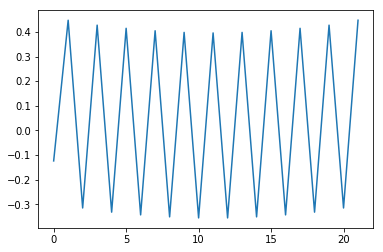

In [540]:
temp = 0
for i in range(Ns):
    temp += ave_2point(sigma2(pos_occupieds[i],zs[i],zzs[i],1))/Ns
plt.plot(np.arange(22),temp[crit_id0])

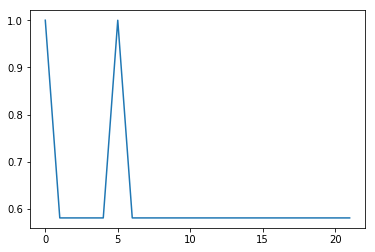

In [581]:
plt.plot(np.arange(22),n_r(pos_occupieds[4],zs[4],holetype = 1)[crit_id0])

In [580]:
n_r(pos_occupieds[0],zs[0],holetype = 1)[124]

array([1.       , 1.       , 0.7835339, 0.7835339, 0.7835339, 0.7835339,
       0.7835339, 0.7835339, 0.7835339, 0.7835339, 0.7835339, 0.7835339,
       0.7835339, 0.7835339, 0.7835339, 0.7835339, 0.7835339, 0.7835339,
       0.7835339, 0.7835339, 0.7835339, 0.7835339])

In [578]:
crit_id0

124